In [3]:
pip install tensorflow

  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 620.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB 4.5 MB/s eta 0:01:26
   ---------------------------------------- 0.2/385.2 MB 2.9 MB/s eta 0:02:12
   ---------------------------------------- 0.5/385.2 MB 4.2 MB/s eta 0:01:32
   ---------------------------------------- 0.5/385.2 MB 4.2 MB/s eta 0:01:32
   ---------------------------------------- 1.0/385.2 MB 4.8 MB/s eta 0:01:20
   ---------------------------------------- 1.4/385.2 MB 5.0 MB/s eta 0:01:17
   ---------------------------------------- 1.4/385.2 MB 5.0 MB/s eta 0:01:17
   ---------------------------------------- 1.4/385.2 MB 5.0 MB/s eta 0:01:17
   -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


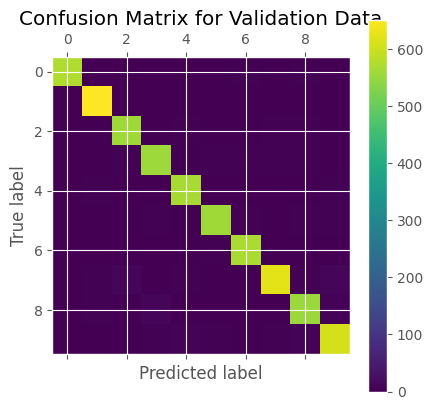

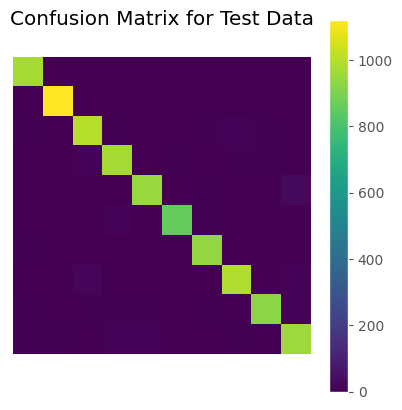

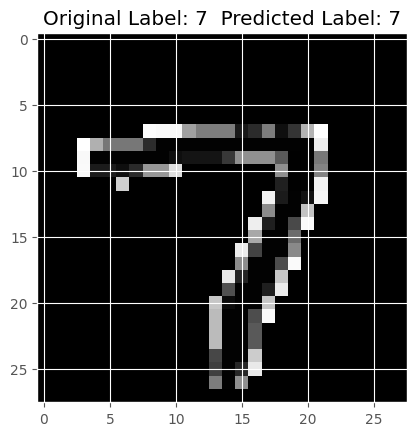

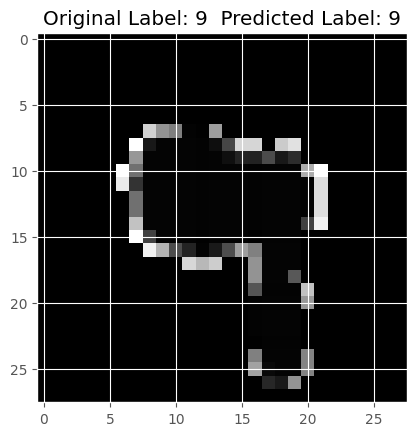

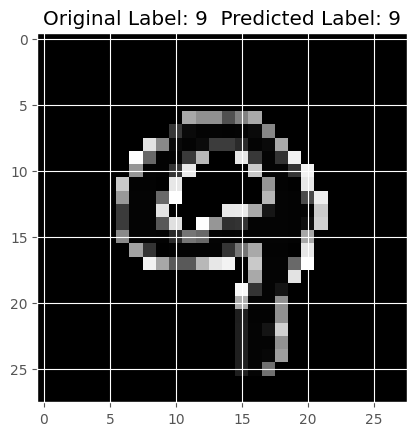

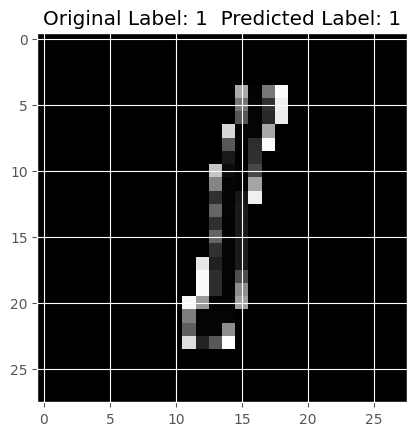

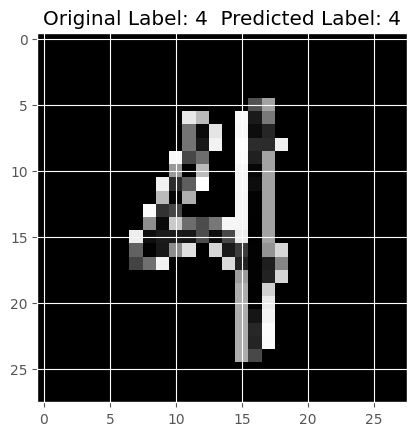

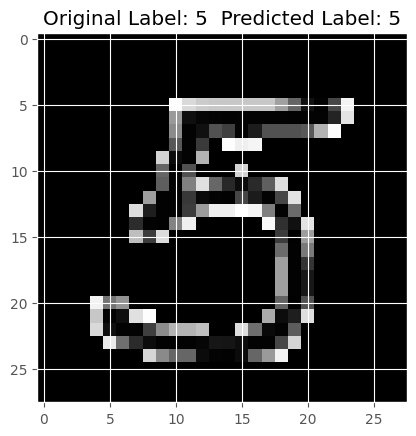

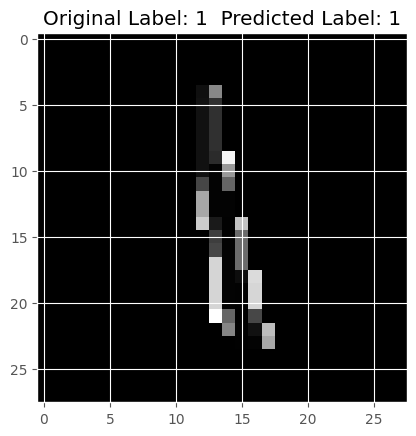

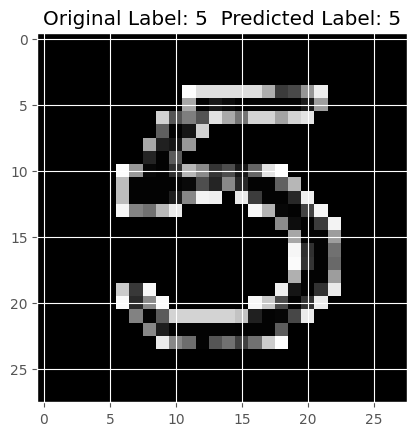

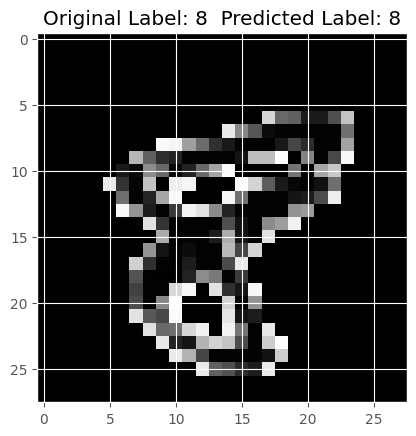

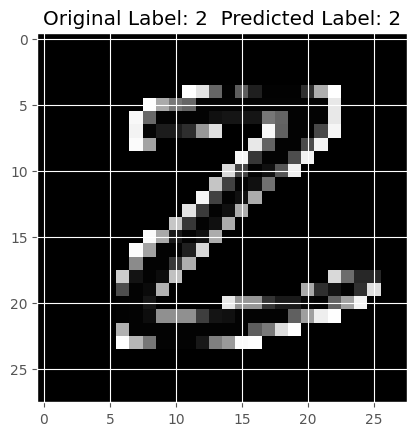

In [5]:
import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
from tensorflow.keras.datasets import mnist
style.use('ggplot')

# Save all the Print Statements in a Log file.
old_stdout = sys.stdout
log_file = open("summary.log", "w", encoding='utf-8')
sys.stdout = log_file

print('\nLoading MNIST Data...')
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Features
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Labels
y_train = np.array(y_train)
y_test = np.array(y_test)

print('\nPreparing Classifier Training and Validation Data...')
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.1)

print('\nRandom Forest Classifier with n_estimators = 100, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = RandomForestClassifier(n_estimators=100, n_jobs=10)
clf.fit(X_train, y_train)

with open('MNIST_RFC.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_RFC.pickle', 'rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_val, y_val)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_val)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_val, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_val, y_pred)

print('\nRFC Trained Classifier Confidence: ', confidence)
print('\nPredicted Values: ', y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)

# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(y_test, test_labels_pred)

print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(y_test, test_labels_pred)

print('\nPredicted Labels for Test Images: ', test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

sys.stdout = old_stdout
log_file.close()

# Show the Test Images with Original and Predicted Labels
print('\nShowing some Test Images with Original and Predicted Labels...')
a = np.random.randint(0, len(X_test), 10)
for i in a:
    two_d = (np.reshape(X_test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(y_test[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()
